Автоматизация построения модели **белого ящика**
---
+ биннинг признаков на основе WoE
+ отбор признаков
+ построение модели логистической регрессии

In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
#pip install lightgbm==3.2.1

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from autowoe import AutoWoE, ReportDeco

Give me some credit
---
+ 150_000 клиентов, разделенных на 2 класса
    + 0 - нет просрочки 90+ 
    + 1 - есть просрочка 90+
+ количественные и категориальные признаки

Задача
---
+ с помощью логистической регрессии построить модель прогнозирования просрочки
+ критерий качества: AUC-ROC

In [4]:
data = pd.read_csv('cs-training.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
# количество пропусков
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
# разделяем выборку на обучающую и тестовую
train, test = train_test_split(data, test_size=0.3, stratify=data['SeriousDlqin2yrs'])

Параметры класса `AutoWoE`
---
**Общие параметры**:
+ interpreted_model
+ monotonic
+ max_bin_count
+ select_type

**Параметры отбора признаков**
+ pearson_th
+ auc_th
+ vif_th
+ imp_th
+ th_const
+ force_single_split
+ imp_type

**Параметры обработки пропусков и редких категорий**
+ th_nan
+ th_cat
+ woe_diff_th
+ min_bin_size
+ min_bin_mults
+ cat_alpha
+ cat_merge_to
+ nan_merge_to

**Параметры валидации и регуляризации**
+ min_gains_to_split
+ auc_tol
+ oof_woe
+ n_folds
+ n_jobs
+ l1_grid_size
+ l1_exp_scale
+ regularized_refit
+ p_val



ReportDeco
---
+ Это обертка для построения отчета по итогам обучения модели
+ Она не обязательна для обучения и применения модели
+ Обязательна для построения отчета

Создаем экземпляр класса AutoWoE
---

In [8]:
auto_woe_0 = AutoWoE(interpreted_model=True,
                    monotonic=True,
                    max_bin_count=8,
                    select_type=None,
                    pearson_th=0.6,
                    auc_th=.501,
                    vif_th=10,
                    imp_th=0,
                    th_const=32,
                    force_single_split=True,
                    th_nan=0.01,
                    th_cat=0.005,
                    auc_tol=1e-4,
                    cat_alpha=100,
                    cat_merge_to='to_woe_0',
                    nan_merge_to='to_woe_0',
                    imp_type='feature_imp',
                    oof_woe=True,
                    regularized_refit=False,
                    p_val=0.05,
                    verbose=0)

Используем обертку ReportDeco - нам нужен отчет
---

In [9]:
auto_woe_0 = ReportDeco(auto_woe_0,)

Параметры метода `.fit()`
---
+ `train`
+ `target_name`
+ `features_type`
+ `group_kf`
+ `max_bin_count`
+ `features_monotone_constraints`
+ `validation`

Обучаем модель
---

In [10]:
auto_woe_0.fit(train,
              target_name='SeriousDlqin2yrs')

[LightGBM] [Info] Number of positive: 5621, number of negative: 78379
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 84000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066917 -> initscore=-2.635046
[LightGBM] [Info] Start training from score -2.635046


Смотрим, как выполнен биннинг для разных признаков
---

In [11]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [18]:
col2use = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

for col in col2use:
    print(col)
    print(auto_woe_0.get_woe(col))
    print(50*'-')

RevolvingUtilizationOfUnsecuredLines
('-inf', '0.14')    1.321052
('0.14', '0.30')    0.745043
('0.30', '0.50')    0.138210
('0.50', '0.70')   -0.414438
('0.70', '0.85')   -0.837098
('0.85', '0.93')   -1.089594
('0.93', '1.00')   -1.221496
('1.00', 'inf')    -2.103224
__NaN_0__           0.000000
dtype: float64
--------------------------------------------------
age
('-inf', '33.50')    -0.559405
('33.50', '38.50')   -0.407847
('38.50', '43.50')   -0.310185
('43.50', '51.50')   -0.177961
('51.50', '55.50')   -0.035613
('55.50', '57.50')    0.119995
('57.50', '63.50')    0.370772
('63.50', 'inf')      0.980132
__NaN_0__             0.000000
dtype: float64
--------------------------------------------------
NumberOfTime30-59DaysPastDueNotWorse
('-inf', '0.00')    0.532081
('0.00', '1.50')   -0.882194
('1.50', '3.50')   -1.736992
('3.50', 'inf')    -2.478469
__NaN_0__           0.000000
dtype: float64
--------------------------------------------------
DebtRatio
('-inf', '0.02')    0.244784


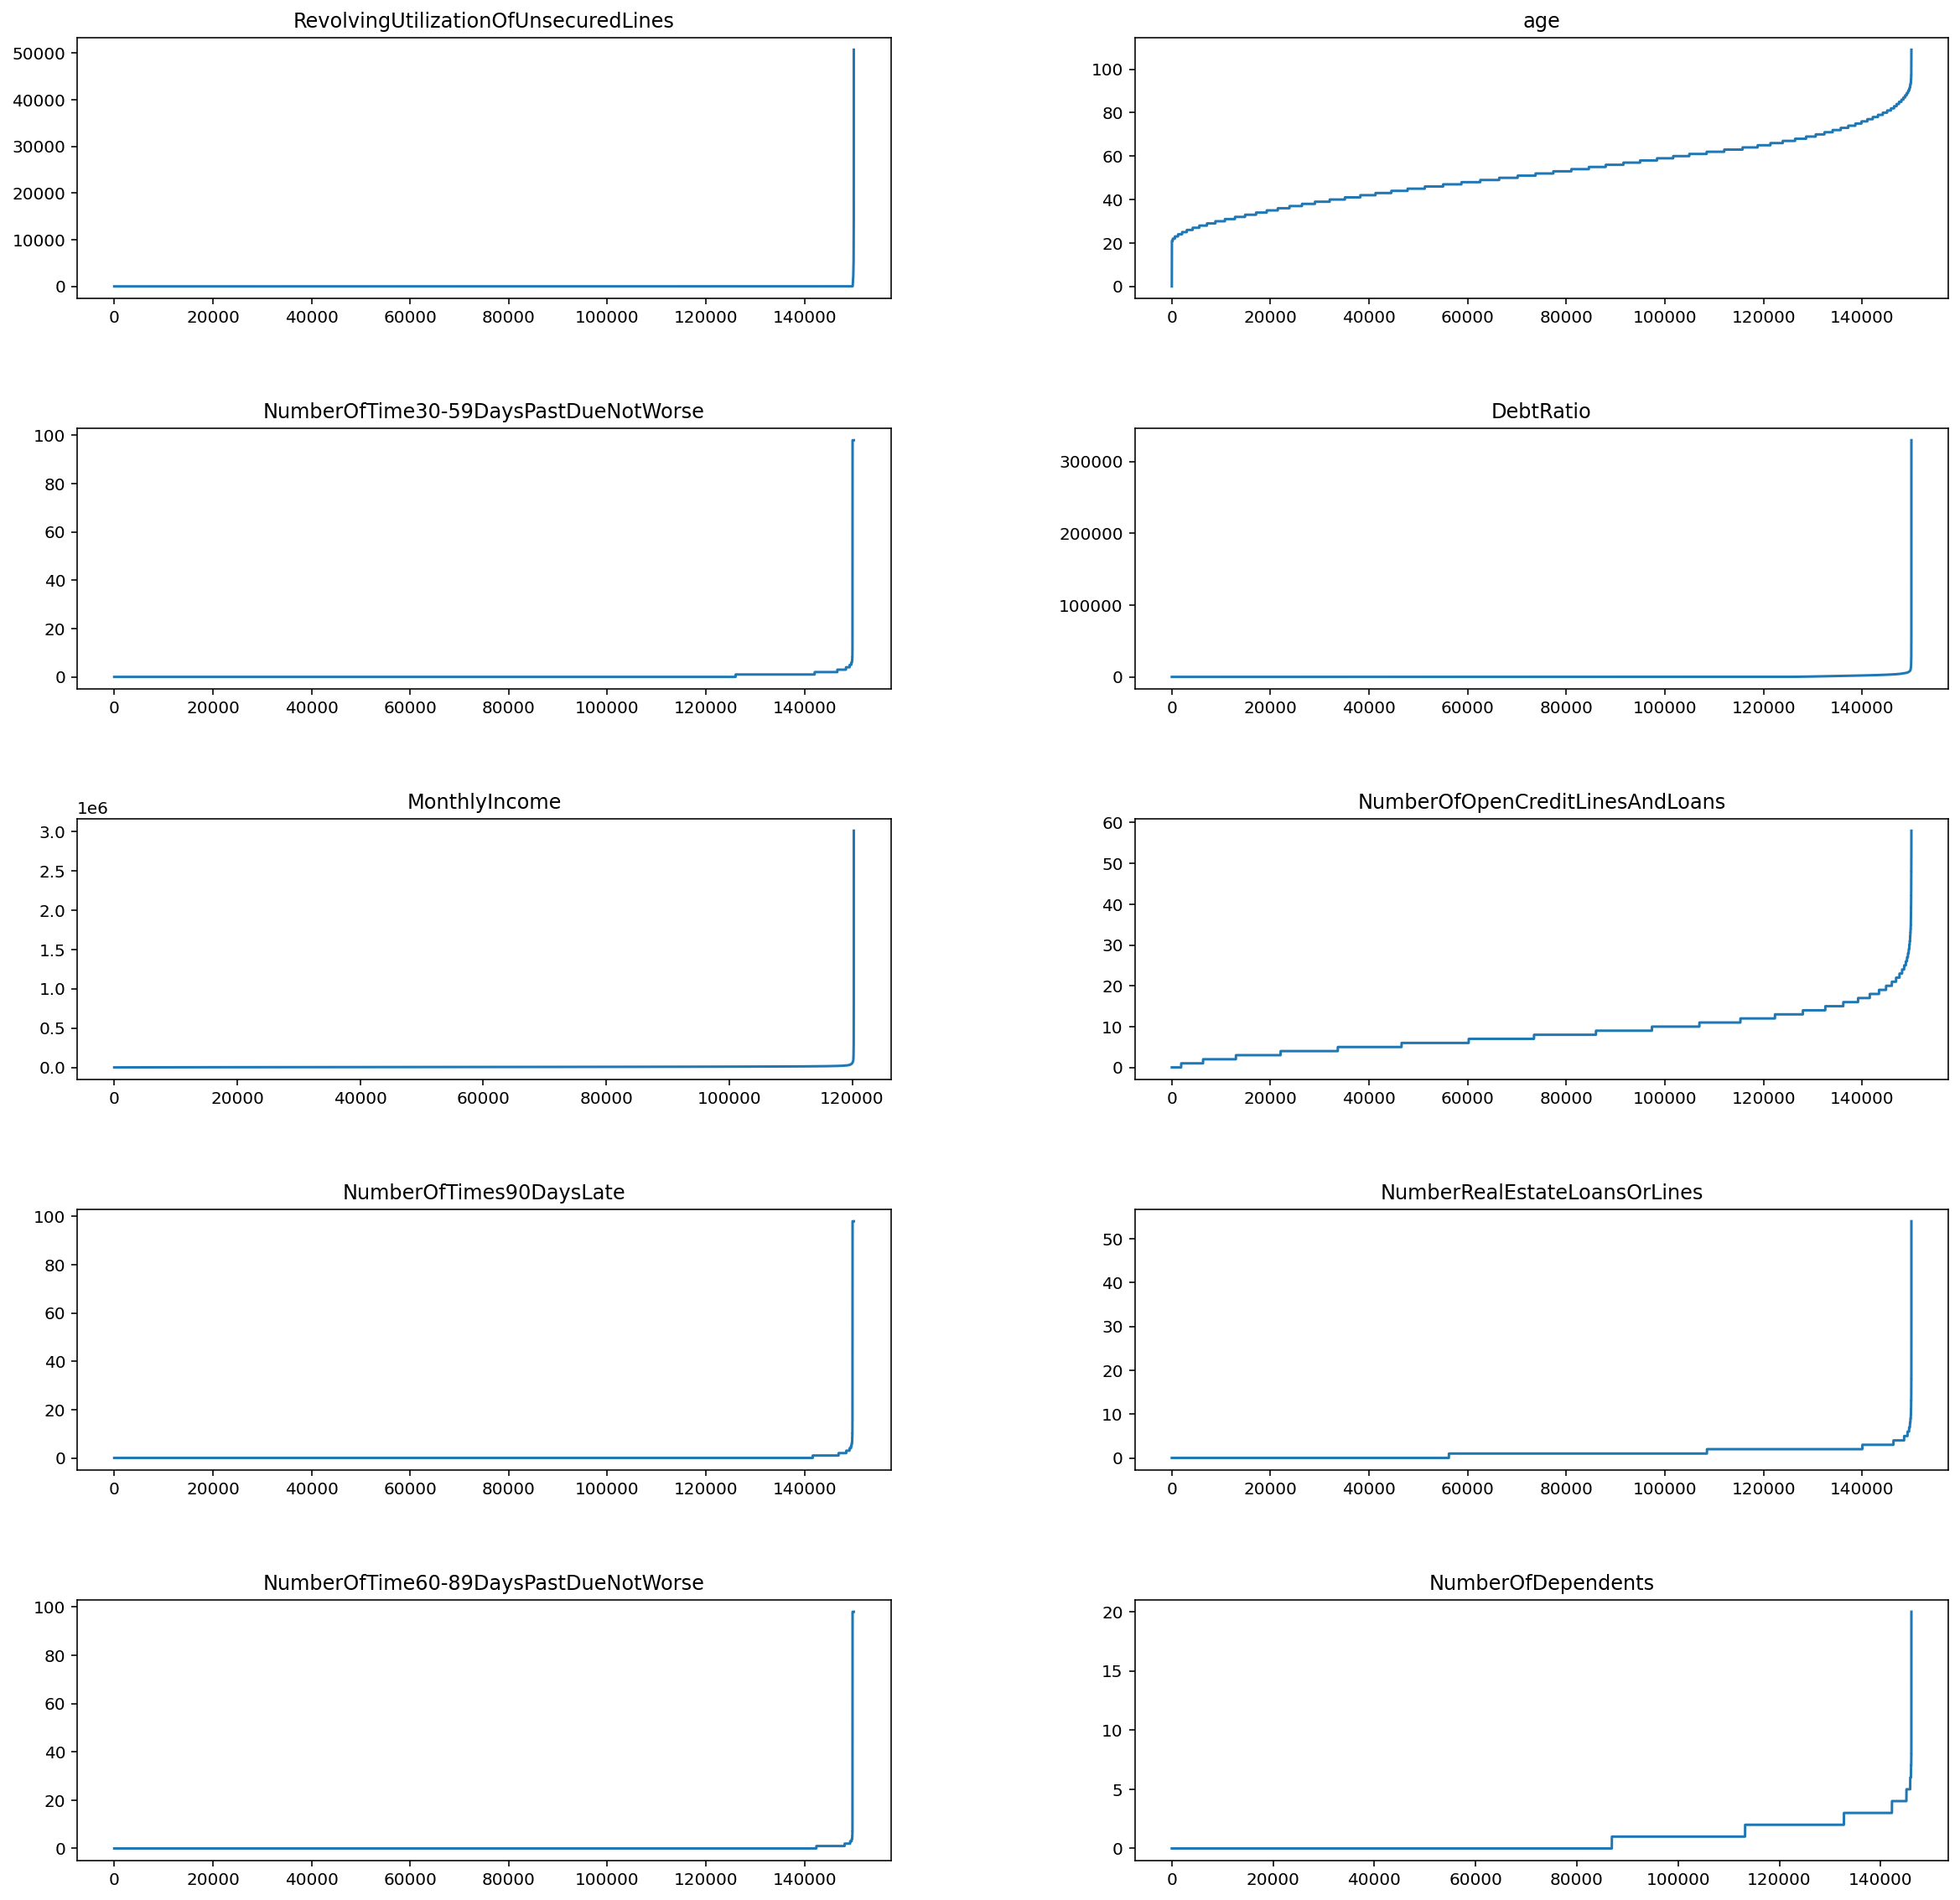

In [41]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.3, hspace=0.5)


for i, col in enumerate(col2use):
    plt.subplot(5,2,i+1)
    plt.title(col)
    plt.plot(data[col].sort_values().reset_index().drop('index', axis=1))
plt.show()

Прогнозы для тестовой выборки
---

In [44]:
test_prediction = auto_woe_0.predict_proba(test)
test_prediction

array([0.10180146, 0.01271456, 0.05976776, ..., 0.22662852, 0.01263492,
       0.01382166])

AUC-ROC для тестовой выборки
---

In [45]:
roc_auc_score(test['SeriousDlqin2yrs'].values, test_prediction)

0.8555560893310985

Генерируем отчет по итогам построения модели
---

In [46]:
# формируем отчет
report_params = {
    # столбец с датой
    "automl_date_column": "report_month",
    # папка, куда будет положен отчет с нужными файлами
    "output_path": "./AUTOWOE_REPORT_1",
    "report_name": "___НАЗВАНИЕ ОТЧЕТА___",
    "report_version_id": 1,
    "city": "Москва",
    "model_aim": "___ЦЕЛЬ ПОСТРОЕНИЯ МОДЕЛИ___",
    "model_name": "___НАЗВАНИЕ МОДЕЛИ___",
    "zakazchik": "___ЗАКАЗЧИК___",
    "high_level_department": "___ПОДРАЗДЕЛЕНИЕ___",
    "ds_name": "___РАЗРАБОТЧИК МОДЕЛИ___",
    "target_descr": "___ОПИСАНИЕ ЦЕЛЕВОГО СОБЫТИЯ___",
    "non_target_descr": "___ОПИСАНИЕ НЕЦЕЛЕВОГО СОБЫТИЯ___"}
auto_woe_0.generate_report(report_params)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [47]:
# смотрим формулу итоговой модели в формате SQL
print(auto_woe_0.get_sql_inference_query('table'))

SELECT
  1 / (1 + EXP(-(
    -2.601
    -0.626*WOE_TAB.RevolvingUtilizationOfUnsecuredLines
    -0.483*WOE_TAB.NumberOfTime30-59DaysPastDueNotWorse
    -0.532*WOE_TAB.NumberOfTimes90DaysLate
    -0.419*WOE_TAB.age
    -0.37*WOE_TAB.NumberOfTime60-89DaysPastDueNotWorse
    -0.369*WOE_TAB.MonthlyIncome
    -0.359*WOE_TAB.NumberOfDependents
    -1.14*WOE_TAB.DebtRatio
  ))) as PROB,
  WOE_TAB.*
FROM 
    (SELECT
    CASE
      WHEN (RevolvingUtilizationOfUnsecuredLines IS NULL OR RevolvingUtilizationOfUnsecuredLines = 'NaN') THEN 0
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.13711 THEN 1.321
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.30168 THEN 0.745
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.5009 THEN 0.138
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.6972 THEN -0.414
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.85329 THEN -0.837
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.92925 THEN -1.09
      WHEN RevolvingUtilizationOfUnsecuredLin